<a href="https://colab.research.google.com/github/kgpawar/P2p_project/blob/main/P2p_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
#Skip first row
p2p = pd.read_csv("/content/sample_data/lending_club_loans.csv",skiprows=1)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
p2p

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599.0,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167.0,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524.0,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178.0,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748.0,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42533,72176,70868.0,2525.0,2525.0,225.0,36 months,9.33%,80.69,B,B3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42534,71623,70735.0,6500.0,6500.0,0.0,36 months,8.38%,204.84,A,A5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42535,70686,70681.0,5000.0,5000.0,0.0,36 months,7.75%,156.11,A,A3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42536,Total amount funded in policy code 1: 460296150,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Removing columns which having all empty values
p2p.dropna(how='all', axis=1, inplace=True)
len(p2p.columns)

61

In [8]:
#Removing columns which having 50% empty values
thresh = len(p2p) * .5
p2p.dropna(thresh = thresh, axis = 1, inplace = True)
print(len(p2p.columns))
p2p.columns

58


Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'last_fico_range_high', 'last_fico_range_low',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bank

In [9]:
p2p.dropna(thresh=29,axis=0,inplace=True)
len(p2p)

42535

In [10]:
for col in p2p.columns:  # Loop through columns
  if len(p2p[col].unique()) == 1:  # Find unique values in column along with their length and if len is == 1 then it contains same values
    print(col)
    p2p.drop([col], axis=1, inplace=True)  # Drop the column
len(p2p.columns)

initial_list_status
policy_code
application_type


55

In [11]:
# get all the columns we want to exam
orig_columns = p2p.columns

# create an empty list for the columns we want to drop
drop_columns = []

# write a for loop
for col in orig_columns:

    # select the columns that offers very little variability
    if p2p[col].value_counts(normalize=True, dropna=False).values[0]>0.9:

        # those columns won't have much predictive value. let's drop it.
        drop_columns.append(col)
print(drop_columns)
# drop the columns
p2p = p2p.drop(drop_columns, axis=1)

# show what we dropped
print('The columns that offers very little variability and need to be removed are: ', drop_columns)

print('\n')
# check the result
print('The number of rows and columns p2p data is: ',p2p.shape)

['pymnt_plan', 'pub_rec', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']
The columns that offers very little variability and need to be removed are:  ['pymnt_plan', 'pub_rec', 'out_prncp', 'out_prncp_inv', 'total_rec_late_fee', 'collections_12_mths_ex_med', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens']


The number of rows and columns p2p data is:  (42535, 44)


In [12]:
list(p2p.columns)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'verification_status',
 'issue_d',
 'loan_status',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'fico_range_low',
 'fico_range_high',
 'inq_last_6mths',
 'open_acc',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'last_credit_pull_d',
 'last_fico_range_high',
 'last_fico_range_low']

In [13]:
# removing those columns which does not give valueable insights to build model


p2p = p2p.drop(['id', 'member_id','int_rate','emp_title','url','desc','zip_code','sub_grade'], axis=1)

# removing those columns which leaks data from the future

p2p = p2p.drop(['funded_amnt','funded_amnt_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt'], axis=1)


print("Total No of columns - ", len(p2p.columns))
p2p.columns

Total No of columns -  26


Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'fico_range_low', 'fico_range_high',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'last_credit_pull_d', 'last_fico_range_high', 'last_fico_range_low'],
      dtype='object')

In [14]:
p2p.drop(['earliest_cr_line', 'last_credit_pull_d','issue_d'], axis=1, inplace=True)

In [15]:
print("Total No of columns - ", len(p2p.columns))
p2p.columns

Total No of columns -  23


Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'fico_range_low', 'fico_range_high', 'inq_last_6mths', 'open_acc',
       'revol_bal', 'revol_util', 'total_acc', 'last_fico_range_high',
       'last_fico_range_low'],
      dtype='object')

<function matplotlib.pyplot.show(close=None, block=None)>

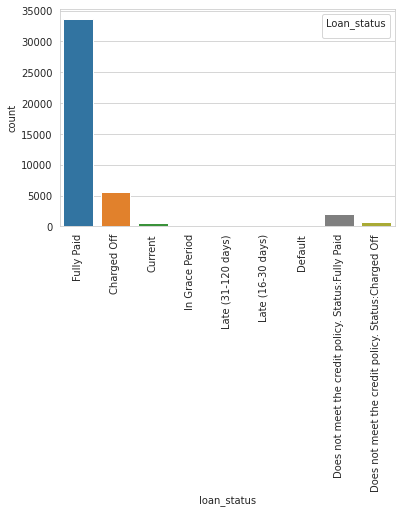

In [16]:
sns.set_style('whitegrid')
ax=sns.countplot(x='loan_status',data=p2p, orient='v')

plt.xticks(rotation=90)
plt.legend(title="Loan_status", loc="upper right")
plt.show

In [17]:
# Remove all rows that contain values other than Fully Paid or Charged Off for the loan_status column
p2p = p2p.loc[p2p['loan_status'].isin(['Fully Paid', 'Charged Off'])]
p2p.shape

(39239, 23)

In [18]:
#Let’s get rid of the missing values,
print(sum(pd.isnull(p2p['fico_range_high'])))
#As there are no null values let's proceed further

#Let's take average of fico_range_low and fico_range_high
p2p['fico_average'] = (p2p['fico_range_high'] - p2p['fico_range_low'])/2
print("Total No of columns - ", len(p2p.columns))

#Let's look at result
p2p[['fico_average','fico_range_high','fico_range_low']]

#Now we have got mean value of FICO score which we can use further
#Now, we can go ahead and drop fico_range_low, fico_range_high, last_fico_range_low, and last_fico_range_high columns.
p2p = p2p.drop(['fico_range_low', 'fico_range_high','last_fico_range_high', 'last_fico_range_low'],axis=1)
print("Total No of columns - ", len(p2p.columns))

0
Total No of columns -  24
Total No of columns -  20


In [19]:
# Create an empty dictionary to store the null counts
null_counts = {}

# Loop through each column and get the count of null values
for c in p2p.columns:
    null_count = sum(pd.isnull(p2p[c]))
    null_counts[c] = null_count

# Print the null counts dictionary
print("Number of null values in each column:")
print(null_counts)

#Removing the columns having the null values
p2p.dropna(how='any',axis=0,inplace=True)
len(p2p)

Number of null values in each column:
{'loan_amnt': 0, 'term': 0, 'installment': 0, 'grade': 0, 'emp_length': 1057, 'home_ownership': 0, 'annual_inc': 0, 'verification_status': 0, 'loan_status': 0, 'purpose': 0, 'title': 11, 'addr_state': 0, 'dti': 0, 'delinq_2yrs': 0, 'inq_last_6mths': 0, 'open_acc': 0, 'revol_bal': 0, 'revol_util': 50, 'total_acc': 0, 'fico_average': 0}


38125

In [20]:
print(p2p.dtypes)
# Filter dataframe columns by datatype 'string'
object_columns_df = p2p.select_dtypes(include=['object']).columns

#Finding count of distinct elements in DataFrame in each column
for i in object_columns_df:
    print(i,len(p2p[i].unique()))

loan_amnt              float64
term                    object
installment            float64
grade                   object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
title                   object
addr_state              object
dti                    float64
delinq_2yrs            float64
inq_last_6mths         float64
open_acc               float64
revol_bal              float64
revol_util              object
total_acc              float64
fico_average           float64
dtype: object
term 2
grade 7
emp_length 11
home_ownership 5
verification_status 3
loan_status 2
purpose 14
title 19023
addr_state 50
revol_util 1087


In [21]:
print(p2p.columns)
p2p = p2p.drop(['title','addr_state'],axis=1)
print("Total No of columns - ", len(p2p.columns))

Index(['loan_amnt', 'term', 'installment', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'purpose', 'title', 'addr_state', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'open_acc', 'revol_bal', 'revol_util', 'total_acc',
       'fico_average'],
      dtype='object')
Total No of columns -  18


In [22]:
# see what are the values in 'revol_util' column
print(p2p['revol_util'])

# Remove % in revol_util and change the data type to float
p2p['revol_util'] = p2p['revol_util'].str.rstrip('%').astype('float')

# view the result
p2p['revol_util']

0        83.7%
1         9.4%
2        98.5%
3          21%
5        28.3%
         ...  
39781    13.1%
39782    26.9%
39783    19.4%
39784     0.7%
39785    51.5%
Name: revol_util, Length: 38125, dtype: object


0        83.7
1         9.4
2        98.5
3        21.0
5        28.3
         ... 
39781    13.1
39782    26.9
39783    19.4
39784     0.7
39785    51.5
Name: revol_util, Length: 38125, dtype: float64

In [23]:
p2p.isnull().sum()

loan_amnt              0
term                   0
installment            0
grade                  0
emp_length             0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
revol_bal              0
revol_util             0
total_acc              0
fico_average           0
dtype: int64

In [24]:
# see what are the values in 'term' column
print(p2p['term'])

# Remove months in term
p2p['term'] = p2p['term'].str.rstrip(' months')

# view the result
p2p['term']

0         36 months
1         60 months
2         36 months
3         36 months
5         36 months
            ...    
39781     36 months
39782     36 months
39783     36 months
39784     36 months
39785     36 months
Name: term, Length: 38125, dtype: object


0         36
1         60
2         36
3         36
5         36
        ... 
39781     36
39782     36
39783     36
39784     36
39785     36
Name: term, Length: 38125, dtype: object

In [25]:
status_replace = {
    "loan_status" : {
        "Fully Paid": 1,
        "Charged Off": 0,
    }
}

p2p = p2p.replace(status_replace)

In [26]:
p2p['loan_status']

0        1
1        0
2        1
3        1
5        1
        ..
39781    1
39782    1
39783    1
39784    1
39785    1
Name: loan_status, Length: 38125, dtype: int64

In [27]:
# see what are the values in 'emp_length' column
print(p2p['emp_length'].value_counts(dropna=False))

# converting categorical value to numerical 
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0
    }
}

p2p = p2p.replace(mapping_dict)

# view the result
p2p['emp_length'].value_counts(dropna=False)

10+ years    8715
< 1 year     4543
2 years      4344
3 years      4050
4 years      3385
5 years      3244
1 year       3207
6 years      2198
7 years      1738
8 years      1457
9 years      1244
Name: emp_length, dtype: int64


10    8715
0     4543
2     4344
3     4050
4     3385
5     3244
1     3207
6     2198
7     1738
8     1457
9     1244
Name: emp_length, dtype: int64

In [28]:
# see what are the values in 'emp_length' column
print(p2p['grade'].value_counts(dropna=False))

# converting categorical value to numerical 
mapping_dict1 = {
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

p2p = p2p.replace(mapping_dict1)

# view the result
p2p['grade'].value_counts(dropna=False)

B    11546
A     9676
C     7801
D     5086
E     2715
F      993
G      308
Name: grade, dtype: int64


2    11546
1     9676
3     7801
4     5086
5     2715
6      993
7      308
Name: grade, dtype: int64

In [29]:
nominal_columns = ["home_ownership", "verification_status", "purpose", "term"]

#Creating dummy columns of Nominal categorical value columns
dummy_df = pd.get_dummies(p2p[nominal_columns])

#Adding dummy columns to dataframe
p2p = pd.concat([p2p, dummy_df], axis=1)

#Dorping the original categorical columns
p2p = p2p.drop(nominal_columns, axis=1)

p2p.head()


,loan_amnt,installment,grade,emp_length,annual_inc,loan_status,dti,delinq_2yrs,inq_last_6mths,open_acc,...,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,term_ 36,term_ 60
0,5000.0,162.87,2,10,24000.0,1,27.65,0.0,1.0,3.0,...,0,0,0,0,0,0,0,0,1,0
1,2500.0,59.83,3,0,30000.0,0,1.00,0.0,5.0,3.0,...,0,0,0,0,0,0,0,0,0,1
2,2400.0,84.33,3,10,12252.0,1,8.72,0.0,2.0,2.0,...,0,0,0,0,0,1,0,0,1,0
3,10000.0,339.31,3,10,49200.0,1,20.00,0.0,1.0,10.0,...,0,0,0,1,0,0,0,0,1,0
5,5000.0,156.46,1,3,36000.0,1,11.20,0.0,3.0,9.0,...,0,0,0,0,0,0,0,1,1,0


In [30]:
p2p.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38125 entries, 0 to 39785
Data columns (total 38 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            38125 non-null  float64
 1   installment                          38125 non-null  float64
 2   grade                                38125 non-null  int64  
 3   emp_length                           38125 non-null  int64  
 4   annual_inc                           38125 non-null  float64
 5   loan_status                          38125 non-null  int64  
 6   dti                                  38125 non-null  float64
 7   delinq_2yrs                          38125 non-null  float64
 8   inq_last_6mths                       38125 non-null  float64
 9   open_acc                             38125 non-null  float64
 10  revol_bal                            38125 non-null  float64
 11  revol_util                  

In [32]:
!pip install pyspark
import pyspark
from pyspark.sql import SparkSession
from pyspark.sql.functions import isnan, when,mean,count, col,desc,year, quarter, when,lit, to_date, to_timestamp, concat, avg,countDistinct
from pyspark.sql.types import StringType
from pyspark.sql.functions import regexp_replace
from pyspark.ml.feature import StringIndexer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 17.3 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=96a6d9978342df846214cdd98640ff0d1c690b61217725ff59f73af48999ee1b
  Stored in directory: /root/.cache/pip/wheels/b1/59/a0/a1a0624b5e865fd389919c1a10f53aec9b12195d6747710baf
Successfully built pyspark


In [33]:
spark = SparkSession.builder.appName("P2P_Lending").getOrCreate()
sc = spark.sparkContext

df_spark = spark.createDataFrame(p2p)

In [34]:
from pyspark.ml.feature import VectorAssembler
col_list=df_spark.columns
# set the input and output column names
assembler = VectorAssembler(inputCols=[ *col_list ], outputCol="features",handleInvalid='skip')

df_spark = assembler.transform(df_spark)


In [35]:
df_spark.show(5)

+---------+-----------+-----+----------+----------+-----------+-----+-----------+--------------+--------+---------+----------+---------+------------+-----------------------+-------------------+--------------------+------------------+-------------------+--------------------------------+-----------------------------------+----------------------------+-----------+-------------------+--------------------------+-------------------+------------------------+-------------+----------------------+---------------+--------------+-------------+------------------------+----------------------+----------------+---------------+--------+--------+--------------------+
|loan_amnt|installment|grade|emp_length|annual_inc|loan_status|  dti|delinq_2yrs|inq_last_6mths|open_acc|revol_bal|revol_util|total_acc|fico_average|home_ownership_MORTGAGE|home_ownership_NONE|home_ownership_OTHER|home_ownership_OWN|home_ownership_RENT|verification_status_Not Verified|verification_status_Source Verified|verification_status_

In [36]:
from pyspark.ml.classification import LogisticRegression

lr = LogisticRegression( labelCol="loan_status",featuresCol="features", maxIter=10, regParam=0.01)

from pyspark.sql.functions import col
(trainingData, testData) = df_spark.randomSplit([0.7, 0.3], seed=100)

In [37]:
trainingData.show()

+---------+-----------+-----+----------+----------+-----------+-----+-----------+--------------+--------+---------+----------+---------+------------+-----------------------+-------------------+--------------------+------------------+-------------------+--------------------------------+-----------------------------------+----------------------------+-----------+-------------------+--------------------------+-------------------+------------------------+-------------+----------------------+---------------+--------------+-------------+------------------------+----------------------+----------------+---------------+--------+--------+--------------------+
|loan_amnt|installment|grade|emp_length|annual_inc|loan_status|  dti|delinq_2yrs|inq_last_6mths|open_acc|revol_bal|revol_util|total_acc|fico_average|home_ownership_MORTGAGE|home_ownership_NONE|home_ownership_OTHER|home_ownership_OWN|home_ownership_RENT|verification_status_Not Verified|verification_status_Source Verified|verification_status_

In [38]:
model =  lr.fit(trainingData)

predictions = model.transform(testData)

In [39]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator(labelCol="loan_status")
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions)))

Test Area Under ROC: 0.9999992393697165


In [40]:
# Train/Test split based on the hardcoded seed value (70 : 30)
(trainingSetDF, testSetDF) = df_spark.randomSplit([0.7, 0.3], 1395)

trainingSetDF.cache()
testSetDF.cache()

DataFrame[loan_amnt: double, installment: double, grade: bigint, emp_length: bigint, annual_inc: double, loan_status: bigint, dti: double, delinq_2yrs: double, inq_last_6mths: double, open_acc: double, revol_bal: double, revol_util: double, total_acc: double, fico_average: double, home_ownership_MORTGAGE: bigint, home_ownership_NONE: bigint, home_ownership_OTHER: bigint, home_ownership_OWN: bigint, home_ownership_RENT: bigint, verification_status_Not Verified: bigint, verification_status_Source Verified: bigint, verification_status_Verified: bigint, purpose_car: bigint, purpose_credit_card: bigint, purpose_debt_consolidation: bigint, purpose_educational: bigint, purpose_home_improvement: bigint, purpose_house: bigint, purpose_major_purchase: bigint, purpose_medical: bigint, purpose_moving: bigint, purpose_other: bigint, purpose_renewable_energy: bigint, purpose_small_business: bigint, purpose_vacation: bigint, purpose_wedding: bigint, term_ 36: bigint, term_ 60: bigint, features: vecto

In [41]:
lr_classifier = LogisticRegression(labelCol="loan_status", featuresCol="features", maxIter=3)

# Train model with Training Data
lrModel = lr_classifier.fit(trainingSetDF)

In [45]:
# Make predictions on train data using the transform() method.
# LogisticRegression.transform() will only use the 'features' column.
predictions = lrModel.transform(trainingSetDF)

In [46]:
# Evaluate model
evaluator = BinaryClassificationEvaluator( labelCol="loan_status")
lr_accuracy = evaluator.evaluate(predictions)

print(lr_accuracy)

0.9999996061108308


In [42]:
# Make predictions on test data using the transform() method.
# LogisticRegression.transform() will only use the 'features' column.
predictions = lrModel.transform(testSetDF)

In [44]:
# Evaluate model
evaluator = BinaryClassificationEvaluator( labelCol="loan_status")
lr_accuracy = evaluator.evaluate(predictions)

print(lr_accuracy)

0.9999992276607136


In [55]:
print("**** Running NaiveBayes Classifier with best parameter found using ML pipeline **** ")
from pyspark.ml.classification import NaiveBayes
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
# Create initial NaiveBayes model
nb_classifier = NaiveBayes(labelCol="loan_status", featuresCol="features", smoothing=50)
#nb_classifier = NaiveBayes(labelCol="label", featuresCol="pcaFeatures", smoothing=50, weightCol="weightColumn" )

# Train model with Training Data
nbModel = nb_classifier.fit(trainingSetDF)

# Make predictions on test data using the transform() method.
# NaiveBayes.transform() will only use the 'features' column.
predictions = nbModel.transform(testSetDF)
predictions1 = nbModel.transform(trainingSetDF)
# Evaluate model
evaluator = MulticlassClassificationEvaluator( labelCol="loan_status", predictionCol="prediction", metricName="accuracy")
nb_accuracy = evaluator.evaluate(predictions)
nb_accuracy1 = evaluator.evaluate(predictions1)
print(nb_accuracy)
print(nb_accuracy1)

**** Running NaiveBayes Classifier with best parameter found using ML pipeline **** 
0.5678085820236624
0.5635284898690249


In [54]:
# Create initial Random Forest Classifier model
from pyspark.mllib.tree import RandomForest, RandomForestModel
from pyspark.ml.classification import GBTClassifier
from pyspark.ml.classification import RandomForestClassifier

print("**** Running Random Forest Classifier with best parameter found using ML pipeline **** ")
rf_classifier = RandomForestClassifier( labelCol="loan_status",impurity="gini", maxDepth=12, numTrees=10, featureSubsetStrategy="auto", seed=1395)

# Train model with Training Data
rf_model = rf_classifier.fit(trainingSetDF)

# Print the Forest tree rules. 
#rf_model.toDebugString

# Make predictions on test data using the transform() method.
# RandomForest.transform() will only use the 'features' column.
predictions = rf_model.transform(testSetDF)
predictions1 = rf_model.transform(trainingSetDF)
#predictions.show(5)

evaluator = BinaryClassificationEvaluator( labelCol = "loan_status" )
rf_accuracy = evaluator.evaluate(predictions)
rf_accuracy1 = evaluator.evaluate(predictions1)
print("accuracy - ", rf_accuracy)
print("accuracy - ", rf_accuracy1)

**** Running Random Forest Classifier with best parameter found using ML pipeline **** 
accuracy -  1.0
accuracy -  1.0
